In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# All the datasets with "District" 

In [2]:
df2 = pd.read_excel('Children.xlsx')

In [8]:
df3 = pd.read_excel('Scheduled Caste.xlsx')

In [ ]:
df4 = pd.read_excel('Crime ST.xlsx')

In [35]:
df5 = pd.read_excel('IPC Crimes.xlsx')

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'Murder (Scheduled Caste)',
       'Rape (Scheduled Caste)', 'Kidnapping and Abduction (Scheduled Caste)',
       'Dacoity (Scheduled Caste)', 'Robbery (Scheduled Caste)',
       'Arson (Scheduled Caste)', 'Hurt (Scheduled Caste)',
       'Prevention of atrocities (POA) Act (Scheduled Caste)',
       'Protection of Civil Rights (PCR) Act (Scheduled Caste)',
       'Other Crimes Against SCs (Scheduled Caste)'],
      dtype='object')

# UNSUPERVISED LEARNING! - CLUSTERING BY DISTRICT DF ONLY!

In [9]:
merged_df = pd.merge(df2, df3, on=['STATE/UT', 'YEAR', 'DISTRICT'], how='inner')
merged_df = pd.merge(merged_df, df4, on=['STATE/UT', 'YEAR', 'DISTRICT'], how='inner')
merged_df = pd.merge(merged_df, df5, on=['STATE/UT', 'YEAR', 'DISTRICT'], how='inner')

In [10]:
merged_df

,STATE/UT,DISTRICT,YEAR,Murder Against Children,Rape Against Children,Kidnapping and Abduction of Children,Foeticide Children,Abetment of suicide (Children),Exposure and abandonment (Children),Procuration of minor girls,...,ARSON (IPC),HURT/GREVIOUS HURT (IPC),DOWRY DEATHS (IPC),ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY (IPC),INSULT TO MODESTY OF WOMEN (IPC),CRUELTY BY HUSBAND OR HIS RELATIVES (IPC),IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES (IPC),CAUSING DEATH BY NEGLIGENCE (IPC),OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8815,LAKSHADWEEP,LAKSHADWEEP,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,0,1,0,1,0,0,32,60
8816,LAKSHADWEEP,TOTAL,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,0,1,0,1,0,0,32,60
8817,PUDUCHERRY,KARAIKAL,2012,0.0,3.0,2.0,0.0,0.0,1.0,0.0,...,1,186,0,2,0,1,0,44,392,787
8818,PUDUCHERRY,PUDUCHERRY,2012,0.0,4.0,16.0,0.0,0.0,2.0,0.0,...,20,632,0,7,2,5,0,219,1668,3494


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8820 entries, 0 to 8819
Data columns (total 65 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   STATE/UT                                                   8820 non-null   object 
 1   DISTRICT                                                   8820 non-null   object 
 2   YEAR                                                       8820 non-null   int64  
 3   Murder Against Children                                    8809 non-null   float64
 4   Rape Against Children                                      8809 non-null   float64
 5   Kidnapping and Abduction of Children                       8809 non-null   float64
 6   Foeticide Children                                         8809 non-null   float64
 7   Abetment of suicide (Children)                             8809 non-null   float64
 8   Exposure

In [12]:
merged_df.duplicated().sum()

10

In [13]:
merged_df = merged_df.drop_duplicates()

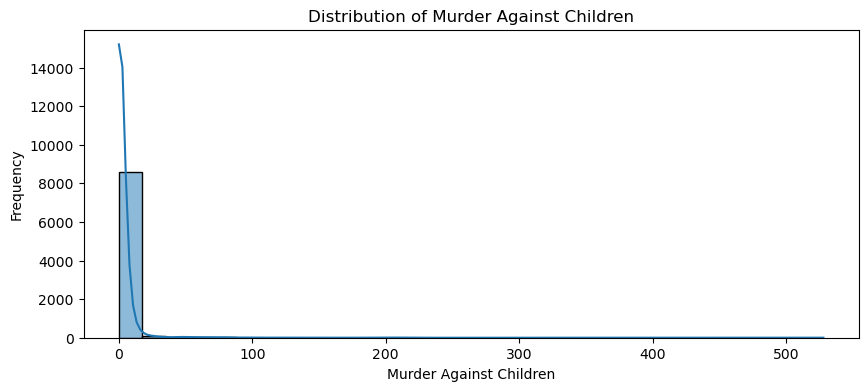

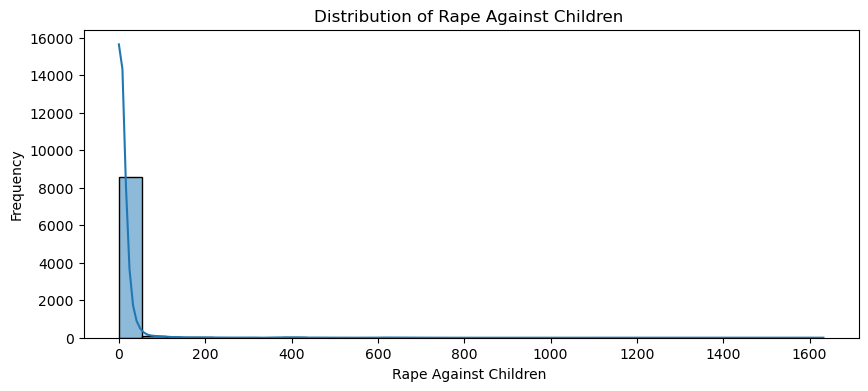

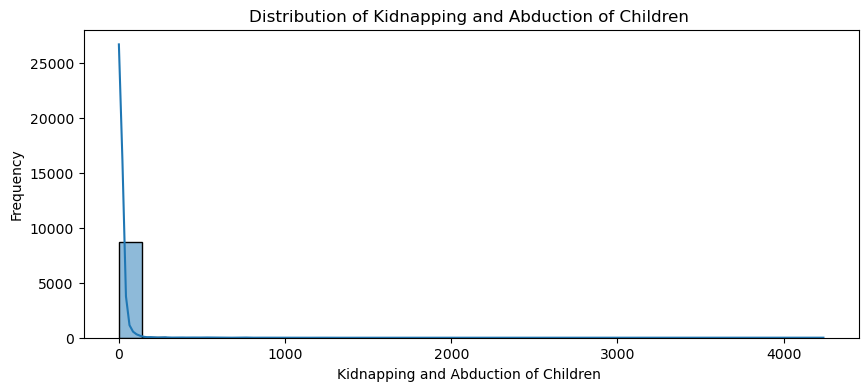

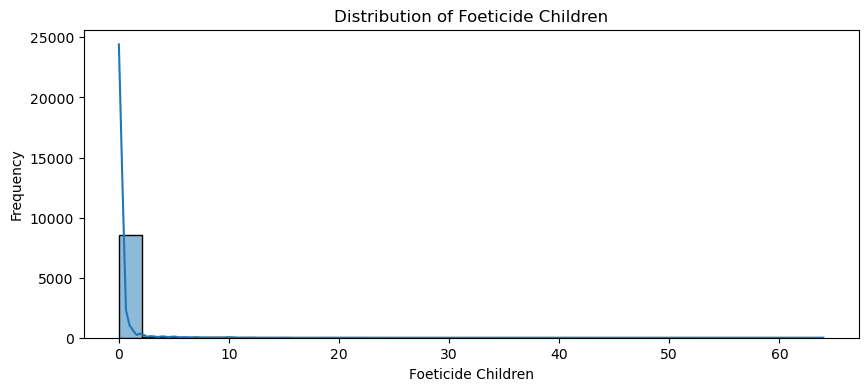

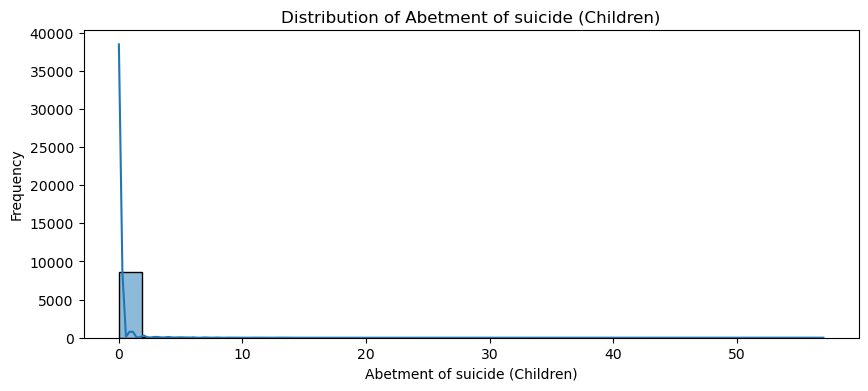

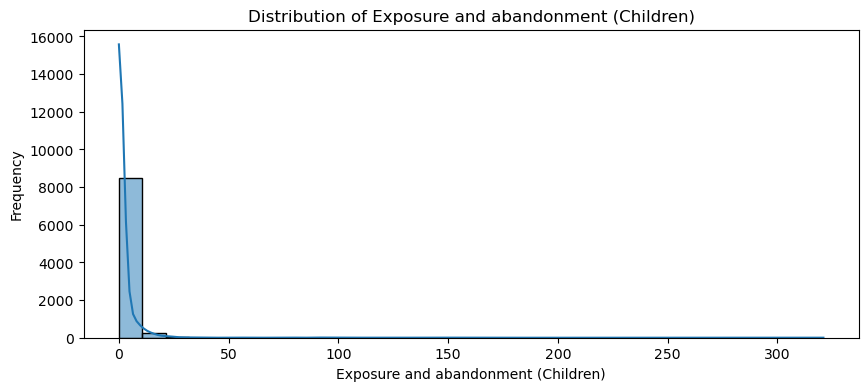

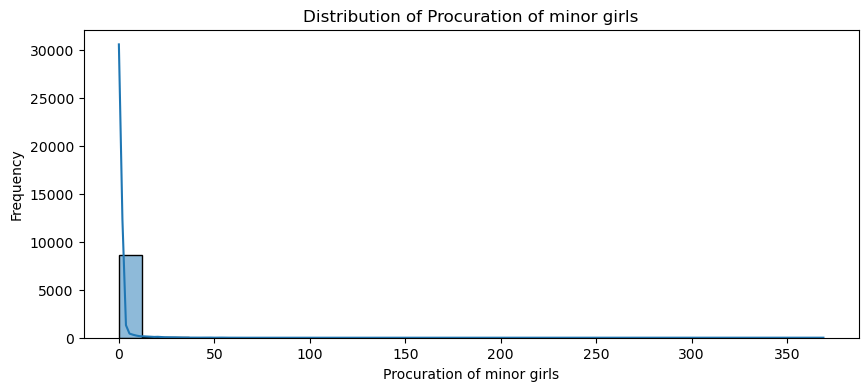

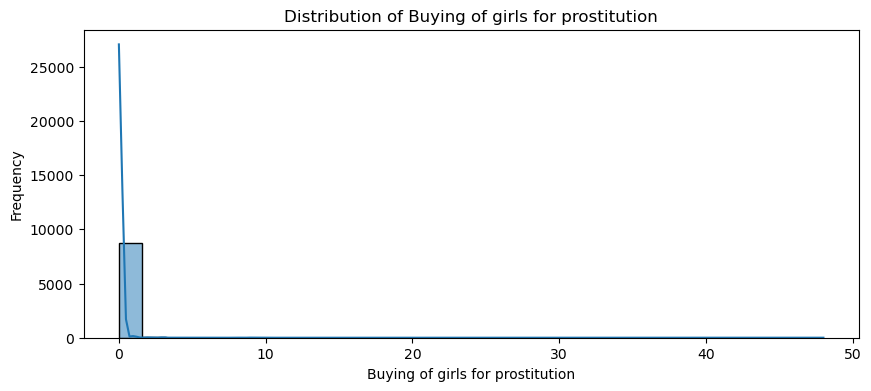

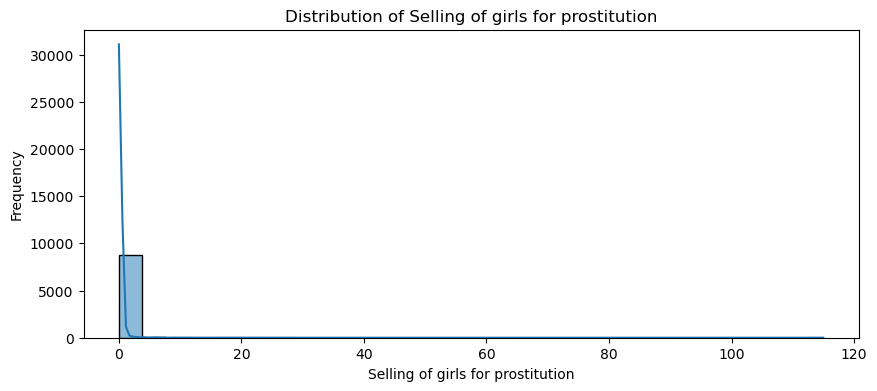

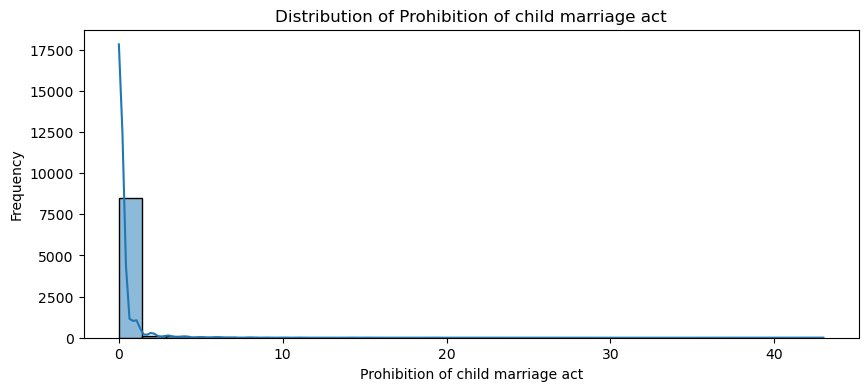

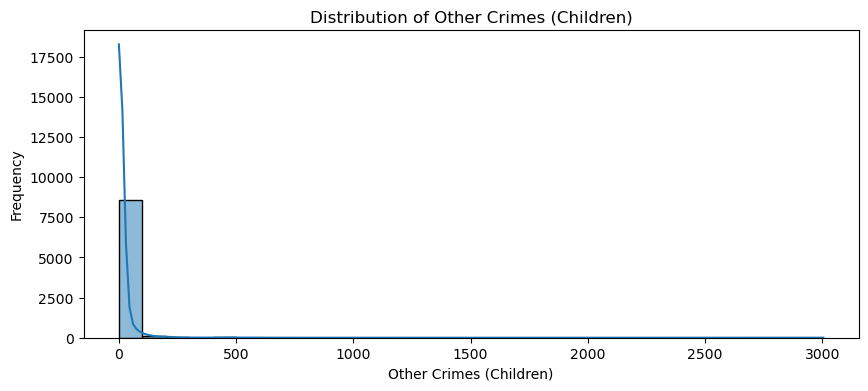

In [14]:
for col in merged_df.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(merged_df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [15]:
for col in merged_df.select_dtypes(include='float64').columns:
    merged_df[col] = merged_df[col].fillna(merged_df[col].median())

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8810 entries, 0 to 8819
Data columns (total 65 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   STATE/UT                                                   8810 non-null   object 
 1   DISTRICT                                                   8810 non-null   object 
 2   YEAR                                                       8810 non-null   int64  
 3   Murder Against Children                                    8810 non-null   float64
 4   Rape Against Children                                      8810 non-null   float64
 5   Kidnapping and Abduction of Children                       8810 non-null   float64
 6   Foeticide Children                                         8810 non-null   float64
 7   Abetment of suicide (Children)                             8810 non-null   float64
 8   Exposure and 

In [45]:
merged_df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'Murder Against Children',
       'Rape Against Children ', 'Kidnapping and Abduction of Children ',
       'Foeticide Children', 'Abetment of suicide (Children)',
       'Exposure and abandonment (Children)', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes (Children)',
       'Total (Children)', 'Murder (Scheduled Caste)',
       'Rape (Scheduled Caste)', 'Kidnapping and Abduction (Scheduled Caste)',
       'Dacoity (Scheduled Caste)', 'Robbery (Scheduled Caste)',
       'Arson (Scheduled Caste)', 'Hurt (Scheduled Caste)',
       'Prevention of atrocities (POA) Act (Scheduled Caste)',
       'Protection of Civil Rights (PCR) Act (Scheduled Caste)',
       'Other Crimes Against SCs (Scheduled Caste)', 'Murder Against ST',
       'Rape Against ST', 'Kidnapping Abduction Against ST',
       'Dacoity Against ST', 'Robbery Against ST

In [ ]:
merged_df['District].duplicated().sum()

In [17]:
zero = (merged_df == 0).sum(axis=0)
total = len(merged_df)
zero_percentage = (zero / total) * 100
print(zero_percentage)

STATE/UT                                              0.000000
DISTRICT                                              0.000000
YEAR                                                  0.000000
Murder Against Children                              50.249716
Rape Against Children                                41.713961
                                                       ...    
CRUELTY BY HUSBAND OR HIS RELATIVES (IPC)            11.623156
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES (IPC)    97.253121
CAUSING DEATH BY NEGLIGENCE (IPC)                    15.391600
OTHER IPC CRIMES                                      0.374574
TOTAL IPC CRIMES                                      0.000000
Length: 65, dtype: float64


In [18]:
#I am going to assume here that it is relevent to keep the zero's since no information is given on whether its missing data or no cases for recorded for the states 

In [19]:
def detect_outliers(merged_df, col):
    Q1 = merged_df[col].quantile(0.25)
    Q3 = merged_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return merged_df[(merged_df[col] < lower_bound) | (merged_df[col] > upper_bound)].index
outlier_indices = set()
for col in merged_df.select_dtypes(include=['float64', 'int64']).columns:
    outlier_indices_col = detect_outliers(merged_df, col)
    outlier_indices.update(outlier_indices_col)
print(f'Total outliers for numeric columns: {len(outlier_indices)}')

Total outliers for numeric columns: 7011


In [20]:
for col in merged_df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = merged_df[col].quantile(0.25)
    Q3 = merged_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    merged_df[col] = merged_df[col].clip(lower=lower_bound, upper=upper_bound)
#My assumption here is to cap the outliers so it doesn't entirely affect the clustering - since outliers are highly senitive to K-means clustering

In [21]:
merged_df.size

572650

In [23]:
merged_df = merged_df[merged_df['DISTRICT'] != 'TOTAL']

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
state_encode = LabelEncoder()
district_encode = LabelEncoder()

merged_df['STATE/UT_encoded'] = state_encode.fit_transform(merged_df['STATE/UT'])
merged_df['DISTRICT_encoded'] = district_encode.fit_transform(merged_df['DISTRICT'])

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
crime_stats = merged_df.columns.difference(['STATE/UT', 'DISTRICT', 'STATE/UT_encoded', 'DISTRICT_encoded', 'YEAR'])
scaler = StandardScaler()
merged_df[crime_stats] = scaler.fit_transform(merged_df[crime_stats])

In [30]:
from sklearn.cluster import KMeans

In [32]:
kmeans_data = KMeans(n_clusters=3, random_state=42)
crime_clusters = kmeans_data.fit_predict(merged_df[crime_stats])
merged_df['Cluster_Data'] = crime_clusters

In [35]:
cluster_mapping = merged_df[['STATE/UT', 'DISTRICT', 'Cluster_Data']]
state_cluster_analysis = cluster_mapping.groupby(['STATE/UT', 'Cluster_Data']).size().reset_index(name='Count')
district_cluster_analysis = cluster_mapping.groupby(['STATE/UT', 'DISTRICT', 'Cluster_Data']).size().reset_index(name='Count')

In [36]:
state_cluster_analysis

,STATE/UT,Cluster_Data,Count
0,A & N ISLANDS,1,24
1,ANDHRA PRADESH,0,74
2,ANDHRA PRADESH,1,41
3,ANDHRA PRADESH,2,243
4,ARUNACHAL PRADESH,1,183
...,...,...,...
72,UTTARAKHAND,0,35
73,UTTARAKHAND,1,121
74,WEST BENGAL,0,120
75,WEST BENGAL,1,105


In [37]:
district_cluster_analysis

,STATE/UT,DISTRICT,Cluster_Data,Count
0,A & N ISLANDS,A and N ISLANDS,1,1
1,A & N ISLANDS,ANDAMAN,1,10
2,A & N ISLANDS,CAR,1,1
3,A & N ISLANDS,NICOBAR,1,10
4,A & N ISLANDS,NORTH,1,1
...,...,...,...,...
1139,WEST BENGAL,SILIGURI G.R.P.,1,12
1140,WEST BENGAL,SILIGURI_PC,0,1
1141,WEST BENGAL,UTTAR DINAJPUR,0,7
1142,WEST BENGAL,UTTAR DINAJPUR,1,3


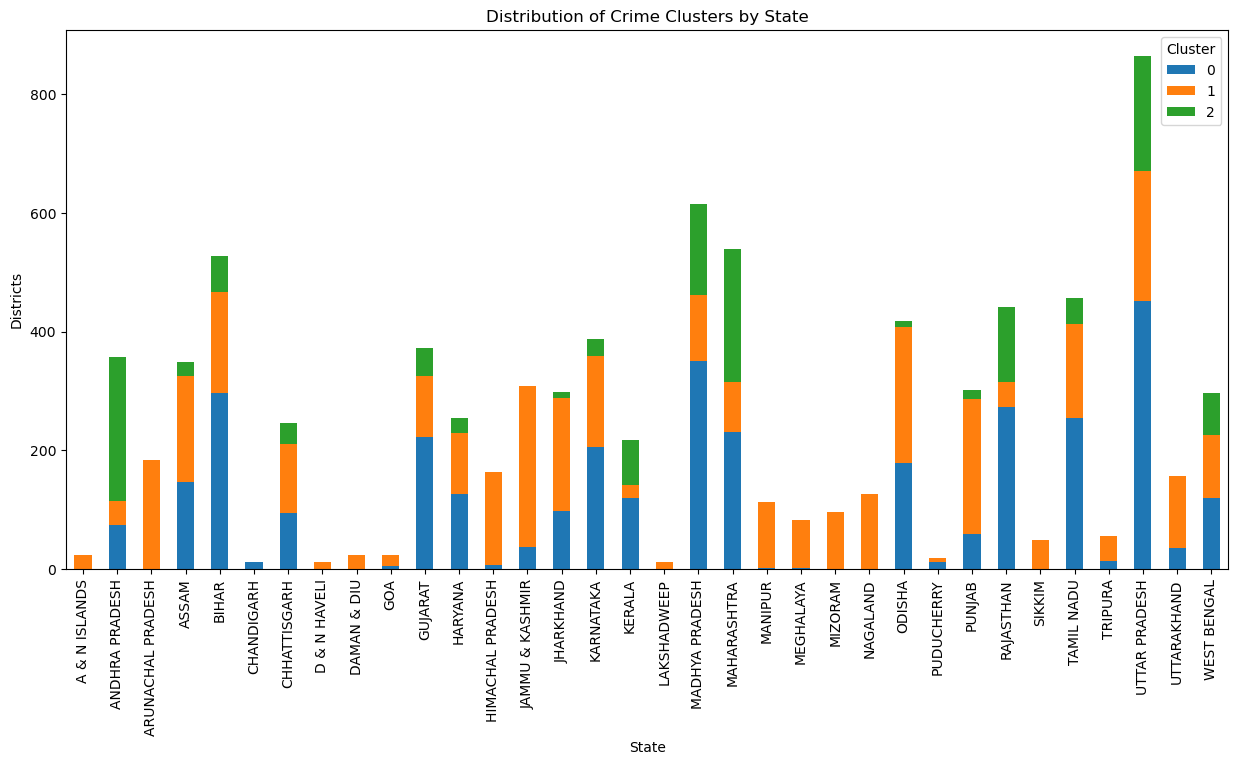

In [38]:
state_cluster_analysis.pivot(index='STATE/UT', columns='Cluster_Data', values='Count').plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Distribution of Crime Clusters by State')
plt.xlabel('State')
plt.ylabel('Districts')
plt.legend(title='Cluster')
plt.show()

In [ ]:
#Majority of the districts in MadhyaPradesh,Bihar, Gujarat, Karnataka, & Haryan come under the sensitive areas 
#Majority of the districts in Punjab, Odhisha, Mizoram, Meghalaya, Himachal Pradesh, Jharkhan, Arunachal Pradesh, A&N, D&N, Daman & DIu, Goa, Lakshadweep, Sikkim, Tripura, Utarakhand, Assam come under the moderate areas
#Very less peaceful districts could be found in AP, MP, Maharashtra, Kerala, Rajasthan

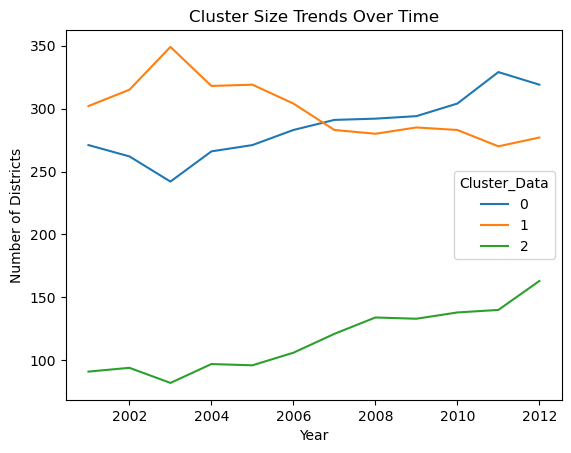

In [43]:
cluster_trend = merged_df.groupby(['YEAR', 'Cluster_Data']).size().unstack(fill_value=0)
cluster_trend.plot()
plt.title('Cluster Size Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Districts')
plt.show()

The trend line for Cluster 0 - Senstive Areas seems to fluctuates over the years but there is an overall downward trend, indicating that the number of districts in this category has decreased.

The Trend line for Cluster - 1 Moderate Areas shows an upward trend, suggesting an increase in the number of districts falling into this category.

The Trend line for Cluster 2 - Peaceful Areas starts with the fewest number of districts but shows a significant increase over time, suggesting that more districts are being classified as peaceful as the years progress.

In [49]:
highsafe_scores = merged_df.groupby('DISTRICT')['Cluster_Data'].mean().sort_values(ascending=False)
safest_districts = safety_scores.head(10)
print("Most Safe Districts:\n", safest_districts)
most_unsafe_districts = highsafe_scores.tail(10)
print("Most Unsafe Districts:\n", most_unsafe_districts)

Most Safe Districts:
 DISTRICT
24 PARGANAS NORTH    2.0
KOLLAM               2.0
BAREILLY             2.0
MUMBAI COMMR.        2.0
MUMBAI               2.0
MORADABAD            2.0
MEERUT               2.0
BANGALORE COMMR.     2.0
SURAT COMMR.         2.0
LUCKNOW              2.0
Name: Cluster_Data, dtype: float64
Most Unsafe Districts:
 DISTRICT
SILIGURI_PC     0.0
BARPETA         0.0
JAIPUR NORTH    0.0
SINGRAULI       0.0
BARMER          0.0
GONDIA          0.0
HOSHANGABAD     0.0
JODHPUR CITY    0.0
SIWAN           0.0
JAMMU           0.0
Name: Cluster_Data, dtype: float64


In [ ]:
#Here are the list of safe and unsafe districts 

In [51]:
highsafe_scores1 = merged_df.groupby('STATE/UT')['Cluster_Data'].mean().sort_values(ascending=False)
safest_STATE = highsafe_scores1.head(10)
print("Most Safe STATE:\n", safest_STATE)
most_unsafe_STATE = highsafe_scores1.tail(10)
print("Most Unsafe STATE:\n", most_unsafe_STATE)

Most Safe STATE:
 STATE/UT
ANDHRA PRADESH       1.472067
A & N ISLANDS        1.000000
D & N HAVELI         1.000000
SIKKIM               1.000000
NAGALAND             1.000000
MIZORAM              1.000000
DAMAN & DIU          1.000000
LAKSHADWEEP          1.000000
ARUNACHAL PRADESH    1.000000
MAHARASHTRA          0.988889
Name: Cluster_Data, dtype: float64
Most Unsafe STATE:
 STATE/UT
RAJASTHAN     0.669683
ASSAM         0.650430
HARYANA       0.598425
ODISHA        0.598086
BIHAR         0.554080
KARNATAKA     0.542636
TAMIL NADU    0.539474
GUJARAT       0.526882
PUDUCHERRY    0.368421
CHANDIGARH    0.166667
Name: Cluster_Data, dtype: float64


In [52]:
cluster_counting = merged_df['Cluster_Data'].value_counts()
print(cluster_counting)

Cluster_Data
1    3585
0    3424
2    1395
Name: count, dtype: int64


In [ ]:
#We have 3585

In [53]:
for cluster in merged_df['Cluster_Data'].unique():
    unique_districts = merged_df[merged_df['Cluster_Data'] == cluster]['DISTRICT'].nunique()
    print(f"Cluster {cluster} has {unique_districts} unique districts")


Cluster 0 has 465 unique districts
Cluster 2 has 218 unique districts
Cluster 1 has 445 unique districts


In [70]:
for cluster in merged_df['Cluster_Data'].unique():
    for year in merged_df['YEAR'].unique():
        yearly_district = merged_df[
            (merged_df['Cluster_Data'] == cluster) & (merged_df['YEAR'] == year)
        ].sort_values('TOTAL IPC CRIMES', ascending=False)['DISTRICT'].head()
        print(f"Top districts in Cluster {cluster} for the year {year}:")
        print(yearly_district)

Top districts in Cluster 0 for the year 2001:
538     CUDDALORE
567       VELLORE
283      ALAPUZHA
568    VILLUPURAM
290      KOTTAYAM
Name: DISTRICT, dtype: object
Top districts in Cluster 0 for the year 2002:
1245        KANCHIPURAM
987            ALAPUZHA
994            KOTTAYAM
1271         VILLUPURAM
865     VADODARA COMMR.
Name: DISTRICT, dtype: object
Top districts in Cluster 0 for the year 2003:
1978             VELLORE
1695            ALAPUZHA
1697    ERNAKULAM COMMR.
1979          VILLUPURAM
1702            KOTTAYAM
Name: DISTRICT, dtype: object
Top districts in Cluster 0 for the year 2004:
2406    ERNAKULAM RURAL
2411           KOTTAYAM
2662          CUDDALORE
2403           ALAPUZHA
2666        KANCHIPURAM
Name: DISTRICT, dtype: object
Top districts in Cluster 0 for the year 2005:
3126    ERNAKULAM RURAL
3131           KOTTAYAM
3123           ALAPUZHA
3134         MALAPPURAM
3389          CUDDALORE
Name: DISTRICT, dtype: object
Top districts in Cluster 0 for the year 2006:

The table here indicates quite a lot of variation in crime rates throughout the years. Crime rates in some district rose and fall over the course of time. This could be due to better law enforcement, socio-economic changes or local policies. 

For Cluster 0: For the 'Sensitive' category, districts like Ernakulam Rural and Alappuzha in Kerala, and Vellore in Tamil Nadu seems to appear as top districts for crime. This means that it a persistent issue in these areas.

For Cluster 1: For the 'Moderate' category, districts like Trichy Rural, Trichy Urban, and Thiruvarur in Tamil Nadu appearing multiple times. It suggests that these areas have a moderate level of crime and requires thorough monitoring but might not be as critical as those in Cluster 0.

For Cluster 2: For the 'Peaceful' category, Kolkata in West Bengal and Patna in Bihar are often listed among the top districts. Despite being in the peaceful cluster, these cities are significant urban centers, which might have better law enforcement in place to keep crime rates relatively lower. (However, its worth noticing that we have different types of crime - we are looking at total of IPC crimes)

The data reveal trends in crime increase or decrease. For example, some district appears in Cluster 0 in the early 2000s but moves to Cluster 1 or 2 in later years, suggesting an improvement in crime rates.

GRP districts appear in different clusters across years, which indicates that crimes related to the railways can fluctuate and may be different from general urban or rural crime trends.

In [65]:
most_common_crime_by_cluster = merged_df.drop(columns=['STATE/UT', 'DISTRICT', 'YEAR']).groupby('Cluster_Data')
print(most_common_crime_by_cluster)

In [63]:
states_in_clusters = merged_df.groupby(['STATE/UT', 'Cluster_Data']).size().unstack(fill_value=0)
print(states_in_clusters)

Cluster_Data         0    1    2
STATE/UT                        
A & N ISLANDS        0   24    0
ANDHRA PRADESH      74   41  243
ARUNACHAL PRADESH    0  183    0
ASSAM              146  179   24
BIHAR              296  170   61
CHANDIGARH          11    0    1
CHHATTISGARH        94  116   36
D & N HAVELI         0   12    0
DAMAN & DIU          0   24    0
GOA                  5   19    0
GUJARAT            223  102   47
HARYANA            127  102   25
HIMACHAL PRADESH     6  158    0
JAMMU & KASHMIR     37  272    0
JHARKHAND           98  190   11
KARNATAKA          205  154   28
KERALA             120   21   77
LAKSHADWEEP          0   12    0
MADHYA PRADESH     351  110  154
MAHARASHTRA        231   84  225
MANIPUR              2  111    0
MEGHALAYA            1   82    0
MIZORAM              0   96    0
NAGALAND             0  126    0
ODISHA             179  228   11
PUDUCHERRY          12    7    0
PUNJAB              59  228   14
RAJASTHAN          273   42  127
SIKKIM    


Bihar has a high number of districts classified in Cluster 0 (296), suggesting a significant presence of sensitive areas according to the crime dataJammu and Kashmiresh has many districts (183) falling into Cluster 1, which might be indicative of moderate crime levels.
Andhra Pradesh has a high number of districts (243) in Cluster 2, suggesting that many areas are classified as peaceful.
Some states or UTs, such as Daman & Diu and Dadra & Nagar Haveli, show no districts in either Cluster 0 or 2, which might suggest uniformity in their crime classification across all districts or possibly incomplete data.